In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as scpo

In [50]:
data = gpd.read_file('./data/landkreise_merged_i.geojson')
data = data.set_index('name')

In [170]:
bundeslaender = data[data.art == 'bundesland']
landkreise = data[data.art == 'landkreis']
dateColNames = landkreise.columns[4:-2]
landkreise[dateColNames] = landkreise[dateColNames].astype(np.int64)
bundeslaender[dateColNames] = landkreise.groupby('partof')[dateColNames].sum()
landkreise.current = landkreise.current.astype(np.int64)
bundeslaender.current = landkreise.groupby('partof').current.sum()

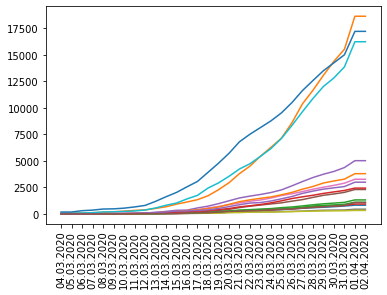

In [167]:
plt.xticks(rotation=90)
for l in bundeslaender.index:
    plt.plot(dateColNames, bundeslaender.loc[l][dateColNames])

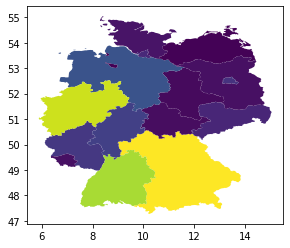

In [172]:
bundeslaender.plot(column='current')

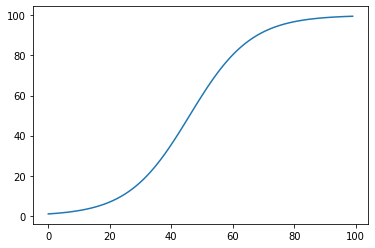

In [176]:
def calcC(t0, n0, alpha, K):
    return ((K - n0) / K) * (np.exp(alpha * t0) / n0)

def logistic(t, alpha, K, C):
    return 1.0 / (C * np.exp(-alpha * t) + (1.0 / K))

time = np.arange(100)
alpha = 0.1
K = 100
C = calcC(0, 1, alpha, K)
n_t = logistic(time, alpha, K, C)

plt.plot(time, n_t)

In [198]:
def createLogistic(t0, n0):
    def logisticR(t, alpha, K):
        C = calcC(t0, n0, alpha, K)
        return logistic(t, alpha, K, C)
    return logisticR

createLogistic(0, 1)

<function __main__.createLogistic.<locals>.logisticR(t, alpha, K)>

In [203]:
t = np.arange(len(dateColNames))
y = bundeslaender.loc['Bayern', :][dateColNames].values
logF = createLogistic(0, 1)
popt, pcov = scpo.curve_fit(logF, t, y)
alpha_opt, K_opt = popt
y_sim = logF(t, alpha_opt, K_opt)

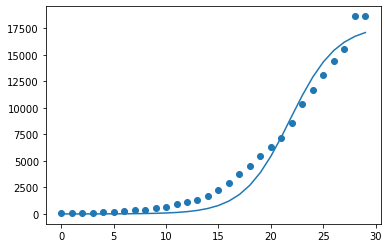

In [214]:
plt.scatter(t, y)
plt.plot(t, y_sim)